- [python 데이터 시각화 Matplotlib 기본1 라벨,범례,틱,스타일,타이틀](https://sikaleo.tistory.com/14)

In [1]:
#hide
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams["font.family"] = 'gulim'
plt.rcParams["figure.figsize"] = (15,5)

In [2]:
#hide
import requests, json
import pandas as pd
from io import StringIO

In [3]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv'

resp1 = requests.get(url, params={
        'id': 'ICSA',
        'cosd': '2015-08-15', # from dt
        #'coed': '2020-08-15', # to dt
})

resp2 = requests.get(url, params={
        'id': 'UNRATE',
        'cosd': '2015-08-15', # from dt
        #'coed': '2020-08-15', # to dt
})

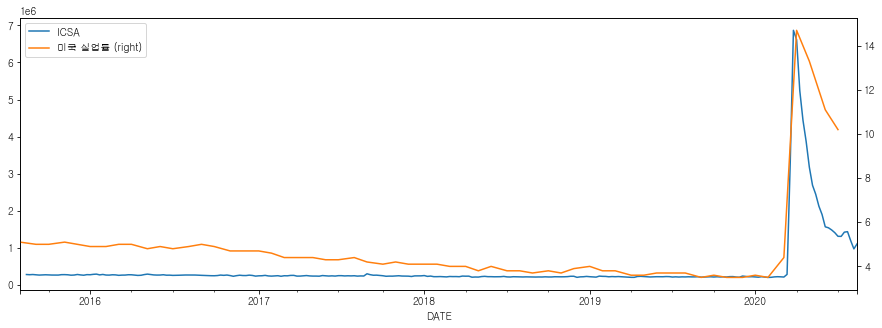

In [4]:
csv = StringIO(resp1.text)
df = pd.read_csv(csv).set_index('DATE')
df.index = pd.to_datetime(df.index)
ax = df.plot(ax = None, label = '미국 신규실업수당 청구건수') 

csv = StringIO(resp2.text)
df = pd.read_csv(csv).set_index('DATE')
df.index = pd.to_datetime(df.index)
df.plot(ax = ax, y='UNRATE', label = '미국 실업률', secondary_y=True)
# df.plot(label = '미국 실업률', secondary_y=True) 

plt.show()

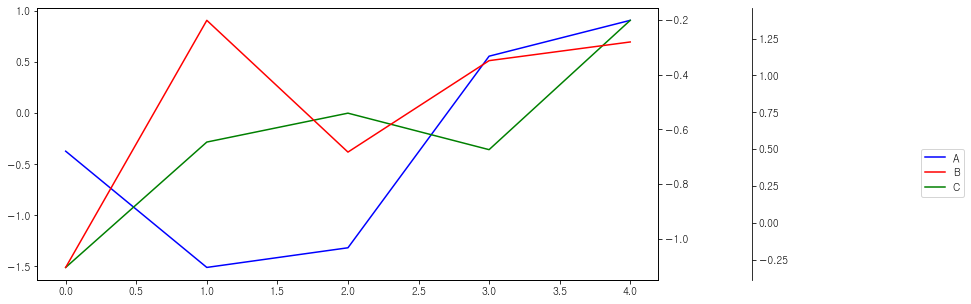

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
df = DataFrame(np.random.randn(5, 3), columns=['A', 'B', 'C'])

fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df.A.plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
df.B.plot(ax=ax, style='r-', secondary_y=True)
df.C.plot(ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['A','B','C'], bbox_to_anchor=(1.5, 0.5))

In [6]:
# hide
label = {
    'AFRO':'African Region (AFRO)',
    'AMRO':'Region of the Americas (PAHO)', # PAHO? AMRO?
    'PAHO':'Region of the Americas (PAHO)', # PAHO? AMRO?
    'SEARO':'South-East Asia Region (SEARO)',
    'EURO':'European Region (EURO)',
    'EMRO':'Eastern Mediterranean Region (EMRO)',
    'WPRO':'Western Pacific Region (WPRO)',
}    

In [7]:
csv_url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
df = pd.read_csv(csv_url) \
       .rename(columns=lambda x: x.strip()) # 컬럼명 앞에 공백있음
df.Date_reported = pd.to_datetime(df.Date_reported)
df = df.set_index('Date_reported')

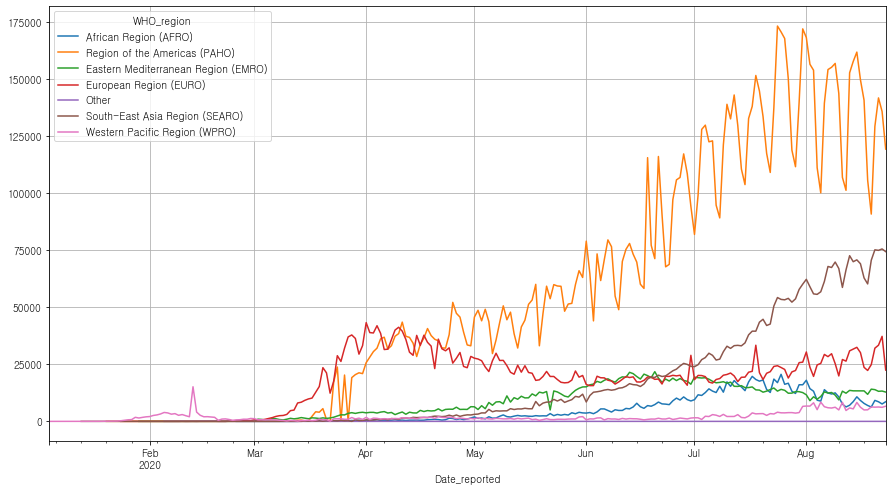

In [8]:
import numpy as np

pv = df.pivot_table(index='Date_reported', columns='WHO_region', values='New_cases', aggfunc=np.sum)
pv = pv.rename(columns=label)
ax = pv.plot(figsize=(15, 8)).grid()

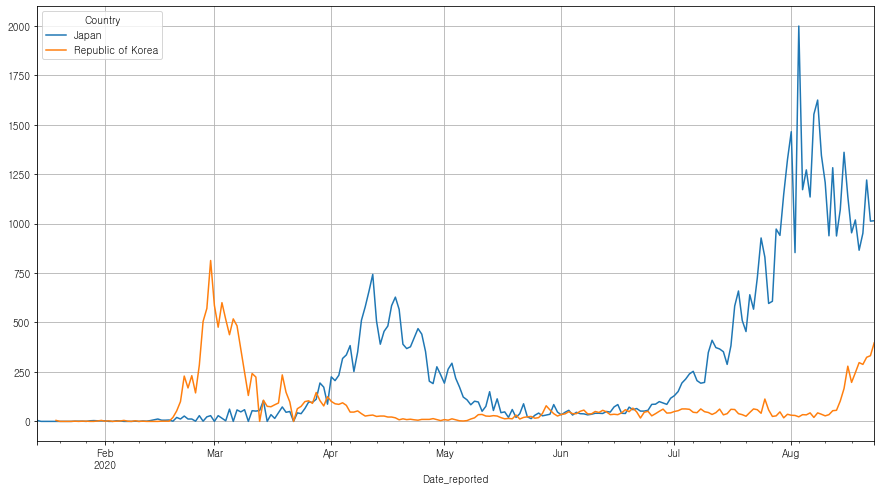

In [9]:
df_country = df['2020':][df.Country_code.isin(['KR','JP'])] # 미국
pv = df_country.pivot_table(
        index='Date_reported', 
        columns='Country', 
        values='New_cases', 
        aggfunc=np.sum)
ax = pv.plot(figsize=(15, 8)).grid()

In [10]:
df_country

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-14,JP,Japan,WPRO,5,5,0,0
2020-01-15,JP,Japan,WPRO,0,5,0,0
2020-01-16,JP,Japan,WPRO,0,5,0,0
2020-01-17,JP,Japan,WPRO,0,5,0,0
2020-01-18,JP,Japan,WPRO,0,5,0,0
...,...,...,...,...,...,...,...
2020-08-19,KR,Republic of Korea,WPRO,297,16058,0,306
2020-08-20,KR,Republic of Korea,WPRO,288,16346,1,307
2020-08-21,KR,Republic of Korea,WPRO,324,16670,2,309
